In [43]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# ZADANIE 1

x1 = cp.Variable() # przenica
x2 = cp.Variable() # soja
x3 = cp.Variable() # maczka

objective = cp.Minimize(300 * x1 + 500 * x2 + 800 * x3)
constraints = [ 
    0.8 * x1 + 0.3 * x2 + 0.1 * x3 >= 0.3,  # weglowodany
    0.01 * x1 + 0.4 * x2 + 0.7 * x3 >= 0.7, # bialko
    0.15 * x1 + 0.1 * x2 + 0.2 * x3 >= 0.1, # sole mineralne
    x1 >= 0,
    x2 >= 0,
    x3 >= 0,
]
p1 = cp.Problem(objective, constraints)
p1.solve(solver=cp.ECOS)

print(f"x1 = {x1.value:.4f}, x2 = {x2.value:.4f}, x3 = {x3.value:.4f}")

x1 = 0.0000, x2 = 0.8235, x3 = 0.5294


In [30]:
# ZADANIE 2
x1 = cp.Variable() # płatki
x2 = cp.Variable() # mleko
x3 = cp.Variable() # chleb

objective = cp.Minimize(0.15 * x1 + 0.25 * x2 + 0.05 * x3)

constraints = [ 
    70 * x1 + 121 * x2 + 65 * x3 <= 2250,    # kalorie
    70 * x1 + 121 * x2 + 65 * x3 >= 2000,
    107 * x1 + 500 * x2 + 0.0 * x3 <= 10000, # witaminy
    107 * x1 + 500 * x2 + 0.0 * x3 >= 5000,
    45 * x1 + 40 * x2 + 60 * x3 <= 1000,     # cukier
    0 <= x1,
    x1 <= 10,
    0 <= x2,
    x2 <= 10,
    0 <= x3,
    x3 <= 10
]

p1 = cp.Problem(objective, constraints)
p1.solve(solver=cp.ECOS)

print(f"x1 = {x1.value:.4f}, x2 = {x2.value:.4f}, x3 = {x3.value:.4f}")

x1 = 6.5882, x2 = 10.0000, x3 = 5.0588


In [31]:
# ZADANIE 3

x_lek1 = cp.Variable()
x_lek2 = cp.Variable()
x_sur1 = cp.Variable()
x_sur2 = cp.Variable()

cost = 100 * x_sur1 + 199.90 * x_sur2 + 700 * x_lek1 + 800 * x_lek2
income = 6500 * x_lek1 + 7100 * x_lek2

objective = cp.Minimize(cost - income)

constraints = [ 
    0.01 * x_sur1 + 0.02 * x_sur2 - 0.5 * x_lek1 - 0.6 * x_lek2 >= 0,                # bilans
    x_sur1 + x_sur2 <= 1000,                                                         # ograniczenia zasobów magazynowych
    90 * x_lek1 + 100 * x_lek2 <= 2000,                                              # ograniczenia zasobów ludzkich
    40.00 * x_lek1 + 50.00 * x_lek2 <= 800,                                          # ograniczenia zasobów sprzętowych
    100.00 * x_sur1 + 199.90 * x_sur2 + 700.00 * x_lek1 + 800.00 * x_lek2 <= 100000, # ograniczenia budżetowe
    x_lek1 >= 0,
    x_lek2 >= 0,
    x_sur1 >= 0,
    x_sur2 >= 0,
]

p1 = cp.Problem(objective, constraints)
p1.solve(solver=cp.ECOS)

print(f"x_lek1 = {x_lek1.value:.3f}, x_lek2 = {x_lek2.value:.3f}, x_sur1 = {x_sur1.value:.3f}, x_sur2 = {x_sur2.value:.3f}")

x_lek1 = 17.552, x_lek2 = 0.000, x_sur1 = 0.000, x_sur2 = 438.789


In [ ]:
# ZADANIE 4

In [35]:
df = pd.read_csv("data01.csv", header=None)

In [47]:
x = np.array(df[0]).reshape(-1, 1)
y = np.array(df[1]).reshape(-1, 1)

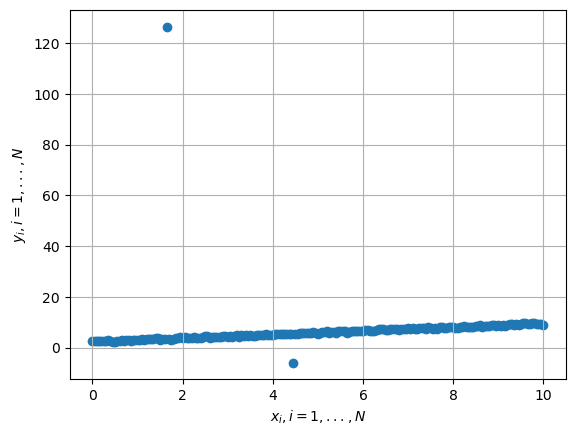

In [107]:
plt.scatter(x, y)
plt.xlabel("$x_i, i = 1,..., N$")
plt.ylabel("$y_i, i = 1,..., N$")
plt.grid()
plt.show()

Metoda LS: a = 0.483237, b = 4.072925
Metoda LP: a = 0.717772, b = 2.334571


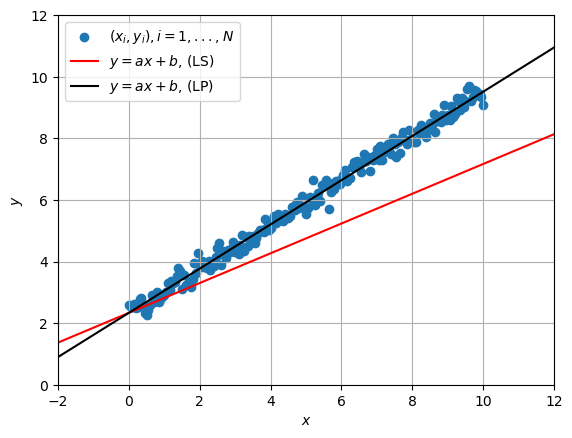

In [112]:
# Create a matrix [[x0, 1], [x1, 1], [x2, 1], ... ] 
A = np.hstack((x, x ** 0))

# Create vectors theta = [a, b] that will be optimized
theta_ls = cvxpy.Variable([2, 1])
theta_lp = cvxpy.Variable([2, 1])

# Optimize with LS
obj = cvxpy.Minimize(cvxpy.norm(A @ theta_ls - y, 2))
cvxpy.Problem(obj,[]).solve(solver=cp.ECOS)

# Optimize with LP 
obj = cvxpy.Minimize(cvxpy.norm(A @ theta_lp - y, 1))
cvxpy.Problem(obj,[]).solve(solver=cp.ECOS)

print(f'Metoda LS: a = {theta_ls.value[0][0]:4f}, b = {theta_ls.value[1][0]:4f}')
print(f'Metoda LP: a = {theta_lp.value[0][0]:4f}, b = {theta_lp.value[1][0]:4f}')

# Create plots from opimized a and b values
x_reg = np.linspace(-2 ,12, 1000)
y_reg_ls = x_reg * theta_ls.value[0][0] + theta.value[1][0]
y_reg_lp = x_reg * theta_lp.value[0][0] + theta.value[1][0]

plt.scatter(x, y)
plt.plot(x_reg, y_reg_ls, c='r')
plt.plot(x_reg, y_reg_lp, c='k')
plt.legend(["$(x_i, y_i), i = 1,...,N$","$y = ax + b$, (LS)", "$y = ax + b$, (LP)"])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-2, 12)
plt.ylim(0, 12)
plt.grid()
plt.show()
